## Data Retrieval from Kaggle

To download the `opendatasets` library used for data acquisition, run the following cell:

```shell
pip install opendatasets --upgrade
```

In [1]:
import opendatasets as od
od.download('https://www.kaggle.com/gbemikeolowe/comprehensiondatas')
!ls

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prannayagupta
Your Kaggle Key: ········


100%|█████████████████████████████████| 9.78k/9.78k [00:00<00:00, 5.03MB/s]

comprehensiondatas
HuggingFaceTransformers.ipynb
Preprocessing.ipynb


In [36]:
od.download("https://www.kaggle.com/c/asap-aes")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prannayagupta
Your Kaggle Key: ········


100%|██████████████████████████████████| 78.8M/78.8M [01:30<00:00, 908kB/s]



Extracting archive .\asap-aes/asap-aes.zip to .\asap-aes


In [37]:
od.download("https://www.kaggle.com/c/feedback-prize-2021")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prannayagupta
Your Kaggle Key: ········


100%|█████████████████████████████████| 32.4M/32.4M [00:15<00:00, 2.23MB/s]



Extracting archive .\feedback-prize-2021/feedback-prize-2021.zip to .\feedback-prize-2021


In [51]:
!tree /f > dataset.txt
!cat dataset.txt | head -n 45 | tail -n 34

+---asap-aes
¦       Essay_Set_Descriptions.zip
¦       test_set.tsv
¦       Training_Materials.zip
¦       training_set_rel3.tsv
¦       training_set_rel3.xls
¦       training_set_rel3.xlsx
¦       valid_sample_submission_1_column.csv
¦       valid_sample_submission_1_column_no_header.csv
¦       valid_sample_submission_2_column.csv
¦       valid_sample_submission_5_column.csv
¦       valid_set.tsv
¦       valid_set.xls
¦       valid_set.xlsx
¦       
+---comprehensiondatas
¦       ProjectData2.csv
¦       
+---feedback-prize-2021
    ¦   sample_submission.csv
    ¦   train.csv
    ¦   
    +---test
    ¦       0FB0700DAF44.txt
    ¦       18409261F5C2.txt
    ¦       D46BCB48440A.txt
    ¦       D72CB1C11673.txt
    ¦       DF920E0A7337.txt
    ¦       
    +---train
            0000D23A521A.txt
            00066EA9880D.txt
            000E6DE9E817.txt
            001552828BD0.txt


cat: write error: No space left on device


## Set-Up and Imports

In [37]:
import pandas as pd, np
import re
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import spacy
from spacy import displacy

from spacy.lang.en import English
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models
import pickle, os
import pyLDAvis
from sklearn.datasets import fetch_20newsgroups
from IPython.display import HTML, display

# Load English tokenizer, tagger, parser and NER
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Prannaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
train = pd.read_csv('feedback-prize-2021/train.csv')
train

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...


In [4]:
query = train.query("id == '423A1CA112E2'").drop(columns=["id", "discourse_id", "discourse_start", "discourse_end", "discourse_type_num"])
query

,discourse_text,discourse_type,predictionstring
0,Modern humans today are always on their phone....,Lead,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,They are some really bad consequences when stu...,Position,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,Some certain areas in the United States ban ph...,Evidence,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,"When people have phones, they know about certa...",Evidence,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,Driving is one of the way how to get around. P...,Claim,139 140 141 142 143 144 145 146 147 148 149 15...
5,That's why there's a thing that's called no te...,Evidence,163 164 165 166 167 168 169 170 171 172 173 17...
6,Sometimes on the news there is either an accid...,Evidence,211 212 213 214 215 216 217 218 219 220 221 22...
7,Phones are fine to use and it's also the best ...,Claim,282 283 284 285 286 287 288 289 290 291 292 29...
8,If you go through a problem and you can't find...,Evidence,297 298 299 300 301 302 303 304 305 306 307 30...
9,The news always updated when people do somethi...,Concluding Statement,355 356 357 358 359 360 361 362 363 364 365 36...


In [5]:
with open("feedback-prize-2021/train/423A1CA112E2.txt") as file:
    text = file.read()

print(text)

Phones

Modern humans today are always on their phone. They are always on their phone more than 5 hours a day no stop .All they do is text back and forward and just have group Chats on social media. They even do it while driving. They are some really bad consequences when stuff happens when it comes to a phone. Some certain areas in the United States ban phones from class rooms just because of it.

When people have phones, they know about certain apps that they have .Apps like Facebook Twitter Instagram and Snapchat. So like if a friend moves away and you want to be in contact you can still be in contact by posting videos or text messages. People always have different ways how to communicate with a phone. Phones have changed due to our generation.

Driving is one of the way how to get around. People always be on their phones while doing it. Which can cause serious Problems. That's why there's a thing that's called no texting while driving. That's a really important thing to remember. S

In [8]:
words = re.split(r"\s+", text)
words

['Phones',
 'Modern',
 'humans',
 'today',
 'are',
 'always',
 'on',
 'their',
 'phone.',
 'They',
 'are',
 'always',
 'on',
 'their',
 'phone',
 'more',
 'than',
 '5',
 'hours',
 'a',
 'day',
 'no',
 'stop',
 '.All',
 'they',
 'do',
 'is',
 'text',
 'back',
 'and',
 'forward',
 'and',
 'just',
 'have',
 'group',
 'Chats',
 'on',
 'social',
 'media.',
 'They',
 'even',
 'do',
 'it',
 'while',
 'driving.',
 'They',
 'are',
 'some',
 'really',
 'bad',
 'consequences',
 'when',
 'stuff',
 'happens',
 'when',
 'it',
 'comes',
 'to',
 'a',
 'phone.',
 'Some',
 'certain',
 'areas',
 'in',
 'the',
 'United',
 'States',
 'ban',
 'phones',
 'from',
 'class',
 'rooms',
 'just',
 'because',
 'of',
 'it.',
 'When',
 'people',
 'have',
 'phones,',
 'they',
 'know',
 'about',
 'certain',
 'apps',
 'that',
 'they',
 'have',
 '.Apps',
 'like',
 'Facebook',
 'Twitter',
 'Instagram',
 'and',
 'Snapchat.',
 'So',
 'like',
 'if',
 'a',
 'friend',
 'moves',
 'away',
 'and',
 'you',
 'want',
 'to',
 'be',
 

In [9]:
query

,discourse_text,discourse_type,predictionstring
0,Modern humans today are always on their phone....,Lead,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,They are some really bad consequences when stu...,Position,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,Some certain areas in the United States ban ph...,Evidence,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,"When people have phones, they know about certa...",Evidence,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,Driving is one of the way how to get around. P...,Claim,139 140 141 142 143 144 145 146 147 148 149 15...
5,That's why there's a thing that's called no te...,Evidence,163 164 165 166 167 168 169 170 171 172 173 17...
6,Sometimes on the news there is either an accid...,Evidence,211 212 213 214 215 216 217 218 219 220 221 22...
7,Phones are fine to use and it's also the best ...,Claim,282 283 284 285 286 287 288 289 290 291 292 29...
8,If you go through a problem and you can't find...,Evidence,297 298 299 300 301 302 303 304 305 306 307 30...
9,The news always updated when people do somethi...,Concluding Statement,355 356 357 358 359 360 361 362 363 364 365 36...


In [10]:
query["prediction"] = query.predictionstring.str.split().apply(lambda lst:[int(i) for i in lst])
query = query.drop(columns="predictionstring")

In [11]:
query

,discourse_text,discourse_type,prediction
0,Modern humans today are always on their phone....,Lead,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,They are some really bad consequences when stu...,Position,"[45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 5..."
2,Some certain areas in the United States ban ph...,Evidence,"[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7..."
3,"When people have phones, they know about certa...",Evidence,"[76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 8..."
4,Driving is one of the way how to get around. P...,Claim,"[139, 140, 141, 142, 143, 144, 145, 146, 147, ..."
5,That's why there's a thing that's called no te...,Evidence,"[163, 164, 165, 166, 167, 168, 169, 170, 171, ..."
6,Sometimes on the news there is either an accid...,Evidence,"[211, 212, 213, 214, 215, 216, 217, 218, 219, ..."
7,Phones are fine to use and it's also the best ...,Claim,"[282, 283, 284, 285, 286, 287, 288, 289, 290, ..."
8,If you go through a problem and you can't find...,Evidence,"[297, 298, 299, 300, 301, 302, 303, 304, 305, ..."
9,The news always updated when people do somethi...,Concluding Statement,"[355, 356, 357, 358, 359, 360, 361, 362, 363, ..."


In [12]:
labels = train.discourse_type.unique().tolist()
labels

['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']

In [13]:
colors = ["#ACDDDE", "#CAF1DE", "#E1F8DC", "#FEF8DD", "#FFE7C7", "#F7D8BA", "#D6CDEA"]

In [14]:
def showLegend():
    s = "<h2>Legend</h2><br>"
    for label, color in zip(labels, colors):
        s += "<font style=\"background-color: %s;\">%s</font><br>" % (color, label)
    display(HTML(s+"<br/><br/><br/>"))

showLegend()

In [15]:
s = ""
for txt,disctype in zip(query.discourse_text.tolist(), query.discourse_type.tolist()):
    s += "<font style=\"background-color: %s;\">%s </font>" % (colors[labels.index(disctype)], txt)

display(HTML(s+"<br/><br/><br/>"))

In [16]:
def colorText(id):
    query = train.query(f"id == '{id}'").drop(columns=["id", "discourse_id", "discourse_start", "discourse_end", "discourse_type_num"])
    s = ""
    for txt,disctype in zip(query.discourse_text.tolist(), query.discourse_type.tolist()):
        s += "<font style=\"background-color: %s;\">%s </font>" % (colors[labels.index(disctype)], txt)
    display(HTML(s+"<br/><br/><br/>"))

In [17]:
colorText('423A1CA112E2')

In [18]:
colorText("4C471936CD75")

In [19]:
showLegend()

for id in train.id.unique()[:50].tolist():
    display(HTML("<h2>"+id+"</h2>"))
    colorText(id)

In [20]:
wcstopwords = set(STOPWORDS)
text = " ".join(train.discourse_text.tolist())

In [21]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=wcstopwords
)

# generate the word cloud
wc.generate(text)

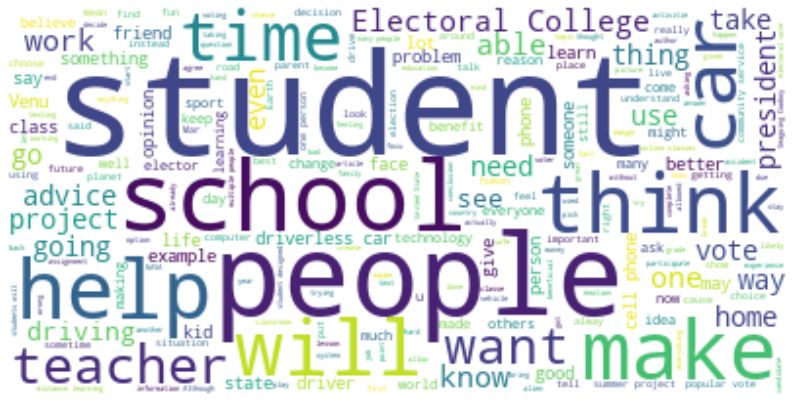

In [22]:
import matplotlib.pyplot as plt
# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [23]:
train

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...
...,...,...,...,...,...,...,...,...
144288,4C471936CD75,1.618153e+12,2234.0,3203.0,if I'm not sure what college I want to attend...,Evidence,Evidence 2,386 387 388 389 390 391 392 393 394 395 396 39...
144289,4C471936CD75,1.618153e+12,3221.0,4509.0,seeking multiple opinions before making a har...,Evidence,Evidence 3,576 577 578 579 580 581 582 583 584 585 586 58...
144290,4C471936CD75,1.618025e+12,4510.0,4570.0,it is better to seek multiple opinions instead...,Position,Position 1,828 829 830 831 832 833 834 835 836 837 838
144291,4C471936CD75,1.618025e+12,4570.0,4922.0,The impact of asking people to help you make a...,Evidence,Evidence 4,839 840 841 842 843 844 845 846 847 848 849 85...


<AxesSubplot:title={'center':'Number of Occurrences of each Discourse Type in All the Essays'}, ylabel='Type of Discourse'>

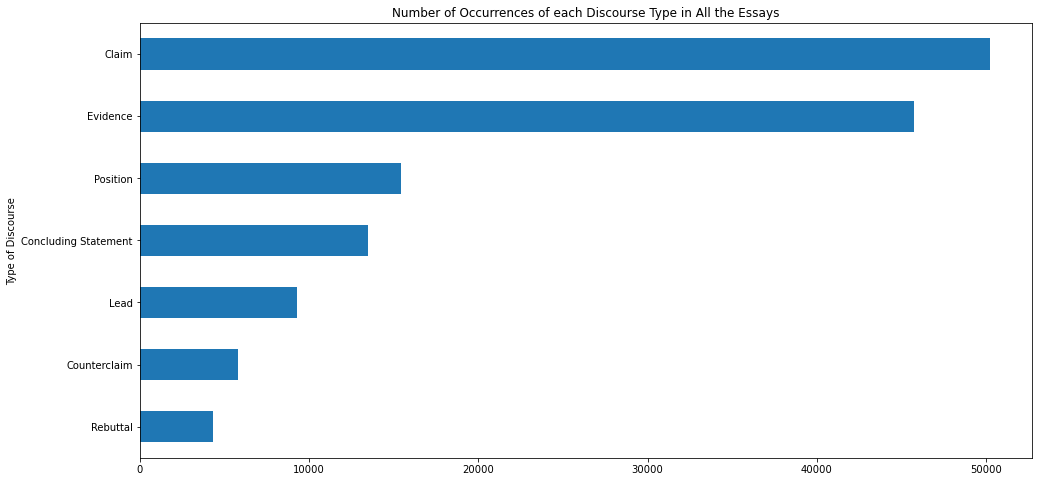

In [24]:
train.groupby("discourse_type").id.count().sort_values().plot.barh(figsize=(16,8), title="Number of Occurrences of each Discourse Type in All the Essays", xlabel="Type of Discourse")

In [25]:
train["prediction"] = train.predictionstring.str.split().apply(lambda lst:[int(i) for i in lst])
train["predictionLen"] = train["prediction"].apply(lambda lst:len(lst))

<AxesSubplot:title={'center':'Number of Words per Discourse Type in all of the Essays'}, ylabel='Type of Discourse'>

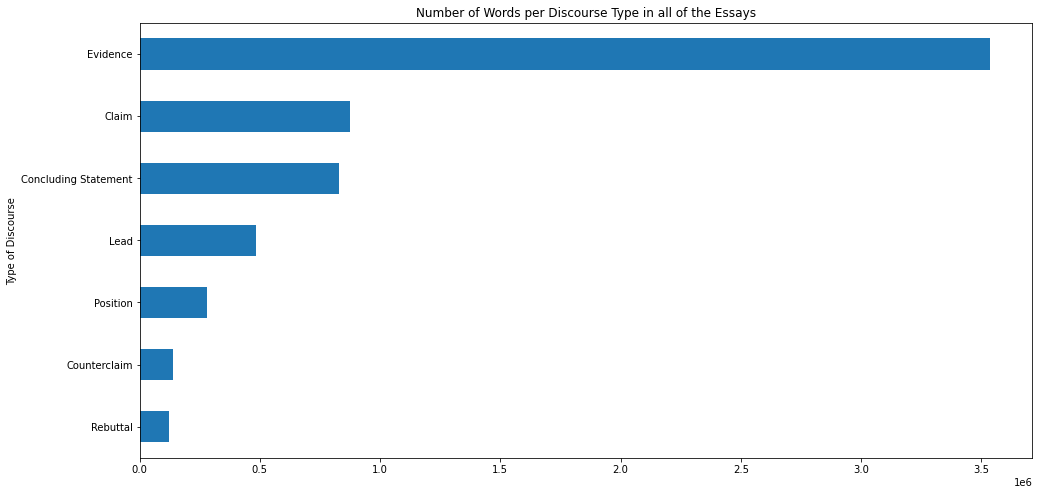

In [26]:
train.groupby("discourse_type").predictionLen.sum().sort_values().plot.barh(figsize=(16,8), title="Number of Words per Discourse Type in all of the Essays", xlabel="Type of Discourse")

In [27]:
with open("feedback-prize-2021/train/4C471936CD75.txt") as file:
    text = file.read()

print(text)

In ancient times, and also still today in some places, leaders of countries, such as presidents, prime ministers, kings, queens, and even the pharaohs of achient Egypt have all had advisers that they would consult to be sure they were making the best decision for their people. But these leaders would almost never have only one adviser, but more often than not they would have several in order to make sure they were doing what was right. But why would some of these leaders insist that they speak to multiple trusted advisers before they made any important decisions? I think someÂ of the reasons people, not solely world leaders, sometimes ask for advice from multiple trustworthy people before making a hard decision is because seeking multiple opinions can help you feel better about your decision to know that other people agree with you, and also because getting multiple opinions will increase the probability of one of those opinions being right.

I believe the main reason that people somet

In [28]:
# Process whole documents
doc = nlp(text)

# Analyze syntax
print("Noun phrases:", [chunk.text for chunk in doc.noun_chunks])
print("Verbs:", [token.lemma_ for token in doc if token.pos_ == "VERB"])

# Find named entities, phrases and concepts
for entity in doc.ents:
    print(entity.text, "==>", entity.label_)

Noun phrases: ['ancient times', 'some places', 'leaders', 'countries', 'presidents', 'prime ministers', 'kings', 'queens', 'even the pharaohs', 'achient', 'Egypt', 'advisers', 'they', 'they', 'the best decision', 'their people', 'these leaders', 'only one adviser', 'they', 'order', 'they', 'what', 'some', 'these leaders', 'they', 'multiple trusted advisers', 'they', 'any important decisions', 'I', 'the reasons', 'people', 'world leaders', 'advice', 'multiple trustworthy people', 'a hard decision', 'multiple opinions', 'you', 'your decision', 'other people', 'you', 'multiple opinions', 'the probability', 'those opinions', 'I', 'the main reason', 'that', 'people', 'multiple peices', 'advice', 'hard decisions', 'you', 'your choice', 'more than one person', 'what', 'you', 'instance', 'the President', 'this', 'the best time', 'their country', 'war', 'they', 'the people', 'they', 'the government', 'the same way', 'it', 'the president', 'their decision', 'they', 'what', 'people', 'their decis

In [29]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

In in ADP IN prep Xx True True
ancient ancient ADJ JJ amod xxxx True False
times time NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
and and CCONJ CC cc xxx True True
also also ADV RB advmod xxxx True True
still still ADV RB conj xxxx True True
today today NOUN NN npadvmod xxxx True False
in in ADP IN prep xx True True
some some DET DT det xxxx True True
places place NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
leaders leader NOUN NNS nsubj xxxx True False
of of ADP IN prep xx True True
countries country NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
such such ADJ JJ amod xxxx True True
as as ADP IN prep xx True True
presidents president NOUN NNS pobj xxxx True False
, , PUNCT , punct , False False
prime prime ADJ JJ amod xxxx True False
ministers minister NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
kings king NOUN NNS conj xxxx True False
, , PUNCT , punct , False False
queens queen NOUN NNS conj xxxx True False
, , PUNC

. . PUNCT . punct . False False


 

 SPACE _SP dep 

 False False
Another another DET DT det Xxxxx True True
reason reason NOUN NN npadvmod xxxx True False
people people NOUN NNS nsubj xxxx True False
might might AUX MD aux xxxx True True
go go VERB VB relcl xx True True
to to ADP IN prep xx True True
more more ADJ JJR amod xxxx True True
than than ADP IN quantmod xxxx True True
one one NUM CD nummod xxx True True
person person NOUN NN pobj xxxx True False
for for ADP IN prep xxx True True
advice advice NOUN NN pobj xxxx True False
before before ADP IN prep xxxx True True
making make VERB VBG pcomp xxxx True False
a a DET DT det x True True
decision decision NOUN NN dobj xxxx True False
is be AUX VBZ ROOT xx True True
because because SCONJ IN mark xxxx True True
having have VERB VBG csubj xxxx True False
more more ADJ JJR amod xxxx True True
opinions opinion NOUN NNS dobj xxxx True False
increases increase VERB VBZ advcl xxxx True False
the the DET DT det xxx True True
probability pro

wanted want VERB VBD advcl xxxx True False
me I PRON PRP nsubj xx True True
to to PART TO aux xx True True
do do VERB VB ccomp xx True True
the the DET DT det xxx True True
opposite opposite ADJ JJ dobj xxxx True False
and and CCONJ CC cc xxx True True
go go VERB VB conj xx True True
into into ADP IN prep xxxx True True
the the DET DT det xxx True True
program program NOUN NN pobj xxxx True False
. . PUNCT . punct . False False
And and CCONJ CC cc Xxx True True
so so ADV RB advmod xx True True
in in ADP IN prep xx True True
third third ADJ JJ amod xxxx True True
grade grade NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
I I PRON PRP nsubj X True True
was be AUX VBD ROOT xxx True True
not not PART RB neg xxx True True
in in ADP IN prep xx True True
AAP AAP PROPN NNP pobj XXX True False
with with ADP IN prep xxxx True True
my my PRON PRP$ poss xx True True
best good ADJ JJS amod xxxx True False
friend friend NOUN NN pobj xxxx True False
, , PUNCT , punct , False False
but b

with with ADP IN prep xxxx True True
gave give VERB VBD acl xxxx True False
you you PRON PRP dative xxx True True
the the DET DT det xxx True True
right right ADJ JJ amod xxxx True False
advice advice NOUN NN dobj xxxx True False
at at ADP IN prep xx True True
the the DET DT det xxx True True
right right ADJ JJ amod xxxx True False
time time NOUN NN pobj xxxx True False
to to PART TO aux xx True True
empower empower VERB VB relcl xxxx True False
you you PRON PRP nsubj xxx True True
do do VERB VBP ccomp xx True True
what what PRON WP nsubj xxxx True True
is be AUX VBZ ccomp xx True True
right right ADJ JJ acomp xxxx True False
for for ADP IN prep xxx True True
you you PRON PRP pobj xxx True True
( ( PUNCT -LRB- punct ( False False
or or CCONJ CC cc xx True True
perhaps perhaps ADV RB advmod xxxx True True
what what PRON WP nsubj xxxx True True
is be AUX VBZ conj xx True True
right right ADJ JJ acomp xxxx True False
for for ADP IN prep xxx True True
the the DET DT det xxx True True
count

In [30]:
displacy.render(doc, style="ent")

C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\spacy\displacy\__init__.py:65: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [31]:
colors = {"ORG": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"ents": ["ORG"], "colors": colors}
displacy.render(doc, style="ent", options=options)

C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\spacy\displacy\__init__.py:65: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [32]:
assert doc.has_annotation("SENT_START")
for sent in doc.sents:
    print(sent.text)
    display(HTML("<hr>"))

In ancient times, and also still today in some places, leaders of countries, such as presidents, prime ministers, kings, queens, and even the pharaohs of achient Egypt have all had advisers that they would consult to be sure they were making the best decision for their people.


But these leaders would almost never have only one adviser, but more often than not they would have several in order to make sure they were doing what was right.


But why would some of these leaders insist that they speak to multiple trusted advisers before they made any important decisions?


I think someÂ of the reasons people, not solely world leaders, sometimes ask for advice from multiple trustworthy people before making a hard decision is because seeking multiple opinions can help you feel better about your decision to know that other people agree with you, and also because getting multiple opinions will increase the probability of one of those opinions being right.




I believe the main reason that people sometimes ask for multiple peices of advice before making hard decisions is because often makes you feel more confident in your choice to know more than one person believes what you are doing is right.


For instance, if the President thinks that this is the best time for their country to go to war, but they don't know if any of the people they rule over, or even the rest of the government, thinks the same way, it would almost certainly make the president feel less confident in their decision than if they knew what people thought about their decision, and they might not do as good a job running the country because they might stress about it.


But if they consulted many advisers before making that vital decision, the advisers might agree with the president, resulting in the president feeling more confident with their decision and ultimately leading the country better than if they just went with what one person said and didn't ask multiple people for advice first.




Another reason people might go to more than one person for advice before making a decision is because having more opinions increases the probability that one or more of the peopleÂ you go to for advice might have the right idea as to what you should do.


For example, if I'm not sure what college I want to attend, and I ask one friend where I should go, they might say "GeorgeÂ Mason" as a suggestion.


But if George Mason is not in fact the best college for me, even though the person I asked was trying to help, that one opinion could sway me to go there anyway and not have the best experience.


But yet if I go to ten people to advice, including the person who suggested George Mason, they might be the only one who would say that and maybe five of the other people I asked might say Virginia Tech, and I would decide to go to Virginia Tech instead of to GeorgeÂ Mason, and I would overall be happier and maybe even get better grades.


Then I would be more successful because I went to multiple people before I made a decision that could affect my entire life.


So therefore even though one person still has a chance to give valid advice, it is safer to talk to multiple people because it increases the chances of making a bad decision.




In my experience, seeking multiple opinions before making a hard decision can be beneficial because of the reasons stated above.


When I was in second grade, I passed the test to be admitted into the AAP (Advanced Academics Program) in my school.


My best friend was also accepted, and wanted me to go to AAP with her, but I didnt really want to go into AAP.


I told my parents this, and they agreed it would be best for me to stay in the normal class for on more year.


Since I got my parents' opinions, I also felt more secure staying out of the advanced program even though my friend wanted me to do the opposite and go into the program.


And so in third grade, I was not in AAP with my best friend, but nonetheless, I was happy and met many new friends in the normal class, some of whom are still my friends today.


When I went into fourth grade, however, I decided that I wanted to go into the AAP program.


Since I had already gotten in a yearÂ before, I was not required to retake the test and went in smoothly to the advanced program.


In this example, I sought three opinions (my parents and my best friend) in order to make a decision,Â but if I had taken my friend's advice alone, I would have gone into AAP in third grade and not have been as happy as I was in the regular class.


Â This shows clearly that it is better to seekÂ multiple opinions instead of just one.


The impact of asking people to helpÂ you make a decision can be big, like a country deciding to go to war, or small, like a third grader choosing if they want to go into the advanced program in school, but nonetheless, asking for other people's opinions instead of just one person's opinion can make a difference in someone's life, whether big or small.




Of course, there are many other reasons one might want to seek multiple opinions and pieces of advice instead of just one, but these are the two main ones that I think really make it worthwhile to ask for advice from multiple people instead of making decisions with only one piece of advice from one person.


The key thing that all of these examples have shown is that it is better to seek multiple opinions from multiple different people than to only get advice from one.


This is ultimately because asking multiple people for advice makes you feel better about the decisions you make and also increases the chances that one or more of the people you consulted with gave you the right advice at the right time to empower you do what is right for you (or perhaps what is right for the country you happen to be in charge of!).Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â 


In [33]:
nlp.enable_pipe("senter")
doc2 = nlp(text)
for sent in doc2.sents:
    print(sent.text)
    display(HTML("<hr>"))

In ancient times, and also still today in some places, leaders of countries, such as presidents, prime ministers, kings, queens, and even the pharaohs of achient Egypt have all had advisers that they would consult to be sure they were making the best decision for their people.


But these leaders would almost never have only one adviser, but more often than not they would have several in order to make sure they were doing what was right.


But why would some of these leaders insist that they speak to multiple trusted advisers before they made any important decisions?


I think someÂ of the reasons people, not solely world leaders, sometimes ask for advice from multiple trustworthy people before making a hard decision is because seeking multiple opinions can help you feel better about your decision to know that other people agree with you, and also because getting multiple opinions will increase the probability of one of those opinions being right.




I believe the main reason that people sometimes ask for multiple peices of advice before making hard decisions is because often makes you feel more confident in your choice to know more than one person believes what you are doing is right.


For instance, if the President thinks that this is the best time for their country to go to war, but they don't know if any of the people they rule over, or even the rest of the government, thinks the same way, it would almost certainly make the president feel less confident in their decision than if they knew what people thought about their decision, and they might not do as good a job running the country because they might stress about it.


But if they consulted many advisers before making that vital decision, the advisers might agree with the president, resulting in the president feeling more confident with their decision and ultimately leading the country better than if they just went with what one person said and didn't ask multiple people for advice first.




Another reason people might go to more than one person for advice before making a decision is because having more opinions increases the probability that one or more of the peopleÂ you go to for advice might have the right idea as to what you should do.


For example, if I'm not sure what college I want to attend, and I ask one friend where I should go, they might say "GeorgeÂ Mason" as a suggestion.


But if George Mason is not in fact the best college for me, even though the person I asked was trying to help, that one opinion could sway me to go there anyway and not have the best experience.


But yet if I go to ten people to advice, including the person who suggested George Mason, they might be the only one who would say that and maybe five of the other people I asked might say Virginia Tech, and I would decide to go to Virginia Tech instead of to GeorgeÂ Mason, and I would overall be happier and maybe even get better grades.


Then I would be more successful because I went to multiple people before I made a decision that could affect my entire life.


So therefore even though one person still has a chance to give valid advice, it is safer to talk to multiple people because it increases the chances of making a bad decision.




In my experience, seeking multiple opinions before making a hard decision can be beneficial because of the reasons stated above.


When I was in second grade, I passed the test to be admitted into the AAP (Advanced Academics Program) in my school.


My best friend was also accepted, and wanted me to go to AAP with her, but I didnt really want to go into AAP.


I told my parents this, and they agreed it would be best for me to stay in the normal class for on more year.


Since I got my parents' opinions, I also felt more secure staying out of the advanced program even though my friend wanted me to do the opposite and go into the program.


And so in third grade, I was not in AAP with my best friend, but nonetheless, I was happy and met many new friends in the normal class, some of whom are still my friends today.


When I went into fourth grade, however, I decided that I wanted to go into the AAP program.


Since I had already gotten in a yearÂ before, I was not required to retake the test and went in smoothly to the advanced program.


In this example, I sought three opinions (my parents and my best friend) in order to make a decision,Â but if I had taken my friend's advice alone, I would have gone into AAP in third grade and not have been as happy as I was in the regular class.


Â This shows clearly that it is better to seekÂ multiple opinions instead of just one.


The impact of asking people to helpÂ you make a decision can be big, like a country deciding to go to war, or small, like a third grader choosing if they want to go into the advanced program in school, but nonetheless, asking for other people's opinions instead of just one person's opinion can make a difference in someone's life, whether big or small.




Of course, there are many other reasons one might want to seek multiple opinions and pieces of advice instead of just one, but these are the two main ones that I think really make it worthwhile to ask for advice from multiple people instead of making decisions with only one piece of advice from one person.


The key thing that all of these examples have shown is that it is better to seek multiple opinions from multiple different people than to only get advice from one.


This is ultimately because asking multiple people for advice makes you feel better about the decisions you make and also increases the chances that one or more of the people you consulted with gave you the right advice at the right time to empower you do what is right for you (or perhaps what is right for the country you happen to be in charge of!).Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â 


In [34]:
nlp2 = English()  # just the language with no pipeline
nlp2.add_pipe("sentencizer")
doc3 = nlp2(text)
for sent in doc3.sents:
    print(sent.text)
    display(HTML("<hr>"))

In ancient times, and also still today in some places, leaders of countries, such as presidents, prime ministers, kings, queens, and even the pharaohs of achient Egypt have all had advisers that they would consult to be sure they were making the best decision for their people.


But these leaders would almost never have only one adviser, but more often than not they would have several in order to make sure they were doing what was right.


But why would some of these leaders insist that they speak to multiple trusted advisers before they made any important decisions?


I think someÂ of the reasons people, not solely world leaders, sometimes ask for advice from multiple trustworthy people before making a hard decision is because seeking multiple opinions can help you feel better about your decision to know that other people agree with you, and also because getting multiple opinions will increase the probability of one of those opinions being right.




I believe the main reason that people sometimes ask for multiple peices of advice before making hard decisions is because often makes you feel more confident in your choice to know more than one person believes what you are doing is right.


For instance, if the President thinks that this is the best time for their country to go to war, but they don't know if any of the people they rule over, or even the rest of the government, thinks the same way, it would almost certainly make the president feel less confident in their decision than if they knew what people thought about their decision, and they might not do as good a job running the country because they might stress about it.


But if they consulted many advisers before making that vital decision, the advisers might agree with the president, resulting in the president feeling more confident with their decision and ultimately leading the country better than if they just went with what one person said and didn't ask multiple people for advice first.




Another reason people might go to more than one person for advice before making a decision is because having more opinions increases the probability that one or more of the peopleÂ you go to for advice might have the right idea as to what you should do.


For example, if I'm not sure what college I want to attend, and I ask one friend where I should go, they might say "GeorgeÂ Mason" as a suggestion.


But if George Mason is not in fact the best college for me, even though the person I asked was trying to help, that one opinion could sway me to go there anyway and not have the best experience.


But yet if I go to ten people to advice, including the person who suggested George Mason, they might be the only one who would say that and maybe five of the other people I asked might say Virginia Tech, and I would decide to go to Virginia Tech instead of to GeorgeÂ Mason, and I would overall be happier and maybe even get better grades.


Then I would be more successful because I went to multiple people before I made a decision that could affect my entire life.


So therefore even though one person still has a chance to give valid advice, it is safer to talk to multiple people because it increases the chances of making a bad decision.




In my experience, seeking multiple opinions before making a hard decision can be beneficial because of the reasons stated above.


When I was in second grade, I passed the test to be admitted into the AAP (Advanced Academics Program) in my school.


My best friend was also accepted, and wanted me to go to AAP with her, but I didnt really want to go into AAP.


I told my parents this, and they agreed it would be best for me to stay in the normal class for on more year.


Since I got my parents' opinions, I also felt more secure staying out of the advanced program even though my friend wanted me to do the opposite and go into the program.


And so in third grade, I was not in AAP with my best friend, but nonetheless, I was happy and met many new friends in the normal class, some of whom are still my friends today.


When I went into fourth grade, however, I decided that I wanted to go into the AAP program.


Since I had already gotten in a yearÂ before, I was not required to retake the test and went in smoothly to the advanced program.


In this example, I sought three opinions (my parents and my best friend) in order to make a decision,Â but if I had taken my friend's advice alone, I would have gone into AAP in third grade and not have been as happy as I was in the regular class.


Â This shows clearly that it is better to seekÂ multiple opinions instead of just one.


The impact of asking people to helpÂ you make a decision can be big, like a country deciding to go to war, or small, like a third grader choosing if they want to go into the advanced program in school, but nonetheless, asking for other people's opinions instead of just one person's opinion can make a difference in someone's life, whether big or small.




Of course, there are many other reasons one might want to seek multiple opinions and pieces of advice instead of just one, but these are the two main ones that I think really make it worthwhile to ask for advice from multiple people instead of making decisions with only one piece of advice from one person.


The key thing that all of these examples have shown is that it is better to seek multiple opinions from multiple different people than to only get advice from one.


This is ultimately because asking multiple people for advice makes you feel better about the decisions you make and also increases the chances that one or more of the people you consulted with gave you the right advice at the right time to empower you do what is right for you (or perhaps what is right for the country you happen to be in charge of!).Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â  Â 


In [35]:
processed = train.discourse_text.map(lambda x: re.sub('[,\.!?]', '', x).lower())
processed

<>:1: DeprecationWarning: invalid escape sequence \.
<>:1: DeprecationWarning: invalid escape sequence \.
C:\Users\Prannaya\AppData\Local\Temp/ipykernel_22456/4006046965.py:1: DeprecationWarning: invalid escape sequence \.
  processed = train.discourse_text.map(lambda x: re.sub('[,\.!?]', '', x).lower())


0         modern humans today are always on their phone ...
1         they are some really bad consequences when stu...
2         some certain areas in the united states ban ph...
3         when people have phones they know about certai...
4         driving is one of the way how to get around pe...
                                ...                        
144288     if i'm not sure what college i want to attend...
144289     seeking multiple opinions before making a har...
144290    it is better to seek multiple opinions instead...
144291    the impact of asking people to help you make a...
144292    there are many other reasons one might want to...
Name: discourse_text, Length: 144293, dtype: object

In [38]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['modern', 'humans', 'today', 'always', 'phone', 'always', 'phone', 'hours', 'day', 'stop', 'text', 'back', 'forward', 'group', 'chats', 'social', 'media', 'even', 'driving']


In [39]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1)]


In [40]:
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.018*"cars" + 0.018*"people" + 0.014*"car" + 0.011*"students" + '
  '0.010*"would" + 0.008*"technology" + 0.007*"driving" + 0.007*"could" + '
  '0.006*"make" + 0.006*"summer"'),
 (1,
  '0.018*"venus" + 0.017*"people" + 0.015*"vote" + 0.015*"person" + '
  '0.012*"could" + 0.011*"good" + 0.011*"seeking" + 0.010*"better" + '
  '0.010*"car" + 0.009*"would"'),
 (2,
  '0.019*"people" + 0.013*"driving" + 0.013*"would" + 0.012*"car" + '
  '0.012*"one" + 0.010*"many" + 0.009*"could" + 0.008*"cell" + 0.008*"phones" '
  '+ 0.007*"think"'),
 (3,
  '0.024*"would" + 0.016*"driverless" + 0.016*"people" + 0.012*"like" + '
  '0.011*"one" + 0.010*"get" + 0.009*"help" + 0.009*"cars" + 0.009*"car" + '
  '0.008*"election"'),
 (4,
  '0.024*"votes" + 0.020*"vote" + 0.019*"one" + 0.011*"even" + '
  '0.011*"different" + 0.010*"car" + 0.010*"people" + 0.008*"us" + '
  '0.007*"students" + 0.007*"face"'),
 (5,
  '0.034*"people" + 0.014*"phones" + 0.014*"know" + 0.013*"driving" + '
  '0.011*"make" + 0.011

In [42]:
# Visualize the topics
!mkdir results
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

A subdirectory or file results already exists.
C:\Users\Prannaya\.conda\envs\analytics\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.104506 -0.036859       1        1  19.526242
7     -0.087606  0.036469       2        1  12.801130
8      0.010484 -0.042955       3        1  10.764675
3     -0.002531  0.003555       4        1   9.899222
6     -0.062574  0.033779       5        1   9.381887
1      0.051317 -0.008510       6        1   8.486014
0      0.035220  0.033569       7        1   8.200322
2      0.055425 -0.008800       8        1   7.864005
4      0.068301  0.063831       9        1   7.222680
5      0.036469 -0.074080      10        1   5.853823, topic_info=             Term          Freq         Total Category  logprob  loglift
2464       advice  21131.000000  21131.000000  Default  30.0000  30.0000
46         people  51232.000000  51232.000000  Default  29.0000  29.0000
14947       votes   6856.000000   6856.000000  Default  28.0000  28.0000
4070         vote  12587.000000  12587.000000  Default  27.0000  27.0000
1214   driverless   4945.000000   4945.000000  Default  26.0000  26.0000
...           ...           ...           ...      ...      ...      ...
558          cars    927.454355  17722.457885  Topic10  -5.2554  -0.1121
125         could    955.566021  24236.241748  Topic10  -5.2256  -0.3952
115         would   1045.519430  39598.481343  Topic10  -5.1356  -0.7962
98           also    799.745235  18555.554996  Topic10  -5.4036  -0.3062
56            get    766.723500  25621.030276  Topic10  -5.4458  -0.6710

[897 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
121       1  0.255714   able
121       2  0.162677   able
121       3  0.041289   able
121       4  0.083678   able
121       5  0.127077   able
...     ...       ...    ...
5210      4  0.130250  zones
5210      5  0.015630  zones
5210      6  0.020840  zones
5210      7  0.661672  zones
5210      8  0.020840  zones

[3036 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 9, 4, 7, 2, 1, 3, 5, 6])

In [43]:
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.018*"cars" + 0.018*"people" + 0.014*"car" + 0.011*"students"')
(1, '0.018*"venus" + 0.017*"people" + 0.015*"vote" + 0.015*"person"')
(2, '0.019*"people" + 0.013*"driving" + 0.013*"would" + 0.012*"car"')
(3, '0.024*"would" + 0.016*"driverless" + 0.016*"people" + 0.012*"like"')
(4, '0.024*"votes" + 0.020*"vote" + 0.019*"one" + 0.011*"even"')
(5, '0.034*"people" + 0.014*"phones" + 0.014*"know" + 0.013*"driving"')
(6, '0.031*"students" + 0.017*"school" + 0.016*"would" + 0.011*"people"')
(7, '0.028*"students" + 0.021*"would" + 0.016*"student" + 0.016*"opinions"')
(8, '0.048*"people" + 0.039*"advice" + 0.017*"help" + 0.012*"cars"')
(9, '0.031*"school" + 0.029*"students" + 0.013*"classes" + 0.012*"make"')
